# Housing Analysis
**Author**: Eric Wehmueller
***

## Overview

This project is the second project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.


## Business Problem

I have been hired by a real estate agencythat helps homeowners buy and/or sell homes.  For this project, I am to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Investigation and Cleaning

To start, we have access to the King County House Sales dataset.  Let's take a look at this to get a feel for what our starting point is and what raw data we have to work with.

In [2]:
df_original = pd.read_csv("data\kc_house_data.csv")

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df_original.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570



Per the project description, I will be ignoring the following features: date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15. For the time being, I am trying to make my modeling phase in this project as simple as possible.

In [5]:
df_col_drops = df_original.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])
display(df_col_drops)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004


In [6]:
df_col_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


Waterfront appears to have ~2000 null values. Let's investigate what values are in this column to see what we can do about the null values.

Which ones are the most important features?

In [7]:
df_col_drops.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Only 146 have a waterfront view. Since this is a binary-filled column, I believe we can fill in all NaNs with a zero value. This makes sense, as NaNs almost certainly denotes the absence of a waterfront view.

In [8]:
df_col_drops.waterfront.fillna(0, inplace=True)
display(df_col_drops.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


In [9]:
df_col_drops.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,3.409825,7.657915,1970.999676
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.650546,1.173200,29.375234
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [10]:
df_col_drops.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

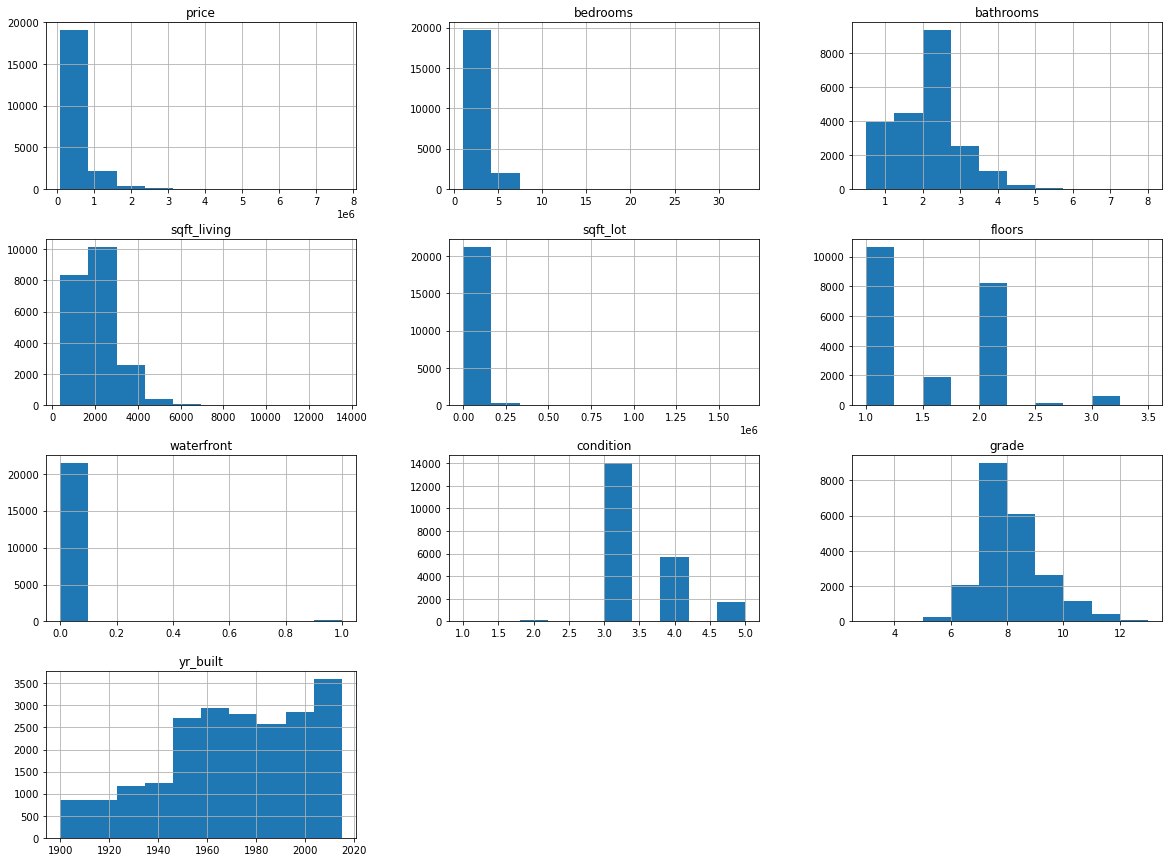

In [11]:
#iterating over all columns except id to see general distributions

df_col_drops.hist(figsize = (20,15));

It appears that we have some outliers in this data, so it's a little difficult to get a sense for what some the distrubutions actually are. 

Specifically, I'm seeing a single entry priced at 7.7 million. 

I also can't really tell what the bedroom distribution is with an outlier of 33. 

sqft_lot has only a single column in this view and the mean is vastly different from the median. We will need to take a closer look at this as well. 

Condition and grade seem to be relatively normal.

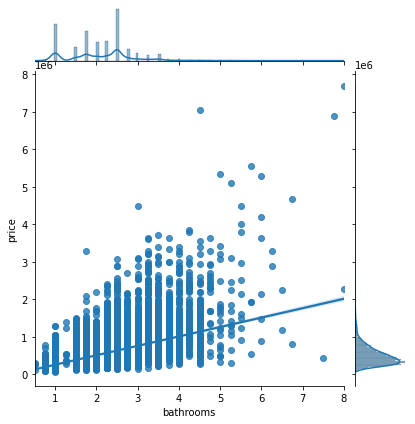

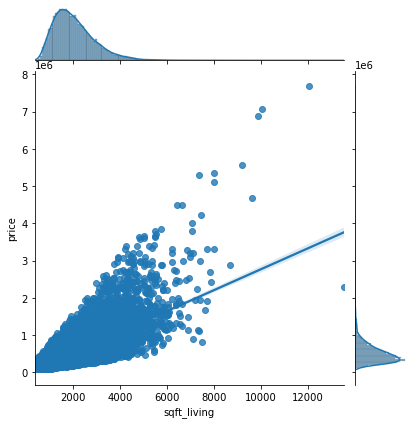

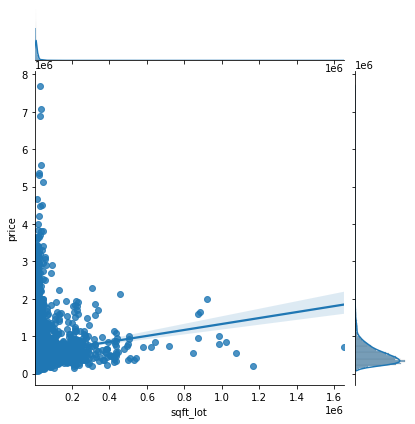

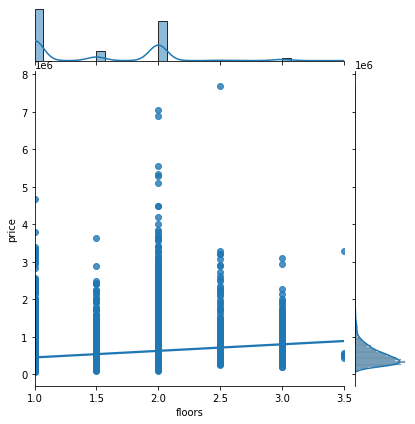

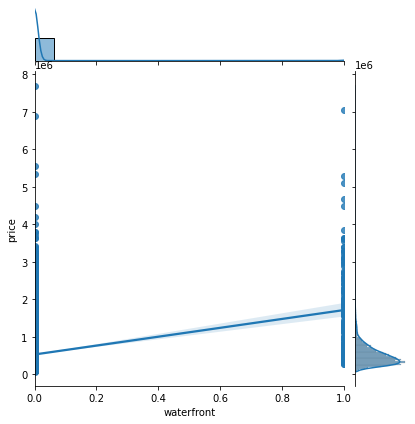

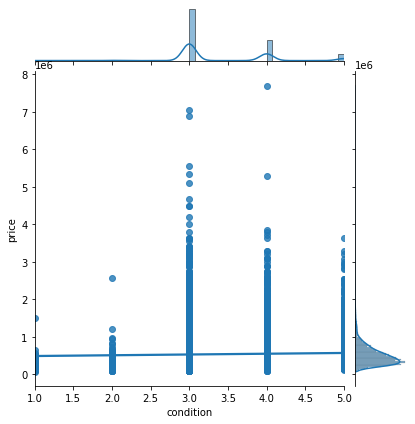

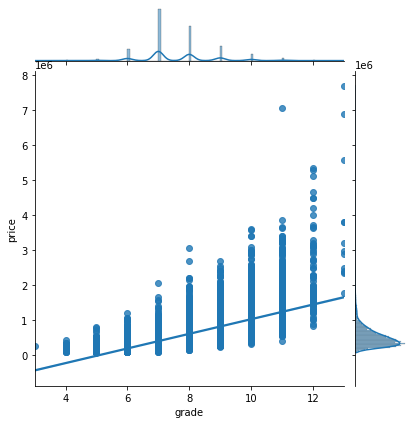

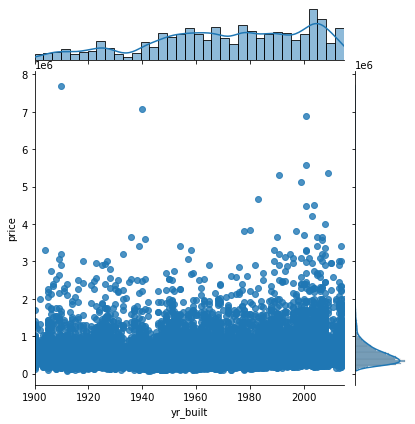

In [12]:
#Check for linearity via jointplots
for col_name in df_col_drops.columns[2:]:
    sns.jointplot(x=col_name, y='price', data=df_col_drops, kind='reg');

It worth noting that these jointplots reveal several of these columns to have linear relations with price.  

**Strong Linear Relation**: sqft_living, grade

**Somehwat Linear**: bathrooms, sqft_lot, waterfront

**Little to No Linear Relation**: floors, condition, yr_built

It appears that the features that have the largest impact on the price of a home are the square footage of the home, as well as the Grade- this rating is given by the King County Housing System. I have copied this system below for more context.

***
1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

# Modeling 
***
## Model 1

In [13]:
outcome = 'price'
x_cols = list(df_col_drops.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']


In [14]:
train, test = train_test_split(df_col_drops)

In [15]:
for col in x_cols:
    train[col] = (train[col] - train[col].mean())/train[col].std()
display(train.head())
print(len(train), len(test))

<ipython-input-15-f07e438ec62e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = (train[col] - train[col].mean())/train[col].std()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
12071,355000.0,1.742071,0.831730,0.496617,-0.135287,-0.91419,-0.081161,2.434267,-0.559361,-0.171763
9435,390000.0,-1.474075,-1.457901,-1.031370,-0.163783,-0.91419,-0.081161,-0.628326,-0.559361,-0.444123
2835,490000.0,-0.402026,-0.476630,-0.525705,0.030282,-0.91419,-0.081161,-0.628326,0.297536,0.441046
5193,813000.0,-0.402026,-0.476630,0.001945,-0.077483,-0.91419,-0.081161,-0.628326,0.297536,-0.376033
5965,425000.0,-1.474075,-0.149540,-0.701588,-0.197894,-0.91419,-0.081161,-0.628326,-0.559361,-0.648393


16197 5400


In [16]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3282.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:10   Log-Likelihood:            -2.2165e+05
No. Observations:               16197   AIC:                         4.433e+05
Df Residuals:                   16187   BIC:                         4.434e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.383e+05   1668.315    322.664      0.000    5.35e+05    5.42e+05
bedrooms    -3.626e+04   2127.568    -17.044      0.000   -4.04e+04   -3.21e+04
bathrooms    3.538e+04   2977.686     11.882      0.000    2.95e+04    4.12e+04
sqft_living  1.521e+05   3385.175     44.937      0.000    1.45e+05    1.59e+05
sqft_lot    -9876.4236   1709.257     -5.778      0.000   -1.32e+04   -6526.091
floors         1.4e+04   2100.396      6.664      0.000    9880.620    1.81e+04
waterfront   5.912e+04   1683.037     35.129      0.000    5.58e+04    6.24e+04
condition    1.173e+04   1813.119      6.467      0.000    8171.733    1.53e+04
grade        1.564e+05   2830.024     55.247      0.000    1.51e+05    1.62e+05
yr_built    -1.133e+05   2193.454    -51.631      0.000   -1.18e+05   -1.09e+05
==============================================================================
Omnibus:                    10367.913   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385671.117
Skew:                           2.533   Prob(JB):                         0.00
Kurtosis:                      26.363   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-values are less than 0.05 for our selected columns. Let's take a look at our residuals for normality.

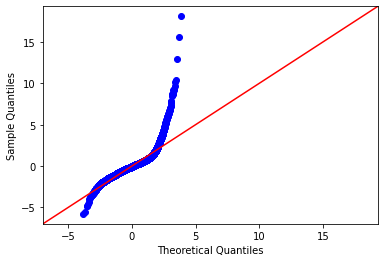

In [17]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

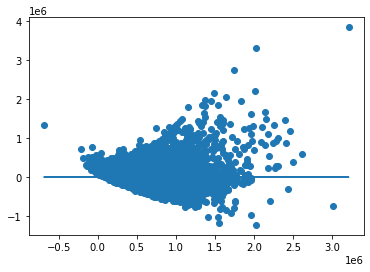

In [18]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

This doesn't look great, as our QQ plot looks incorrect and we have a pronounced funnel shape on our check for homoscedasticity. We are going to need to make some changes.

## Model 2 Iterations

For this iteration, I'm going to remove some outliers. (log transformation?)

I recall having the most issues determining the normal distributions of sqft_lot and bedrooms, so I'm going to filter on both.

<AxesSubplot:>

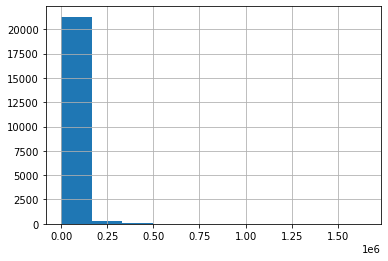

In [19]:
df_col_drops.sqft_lot.hist()

In [20]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.7199999999
0.98 percentile: 107157.0
0.99 percentile: 213008.0


I think filtering out homes with greater than 100k sqaure feet is acceptable here.

<AxesSubplot:>

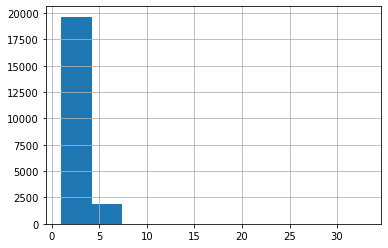

In [21]:
df_col_drops.bedrooms.hist()

In [22]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_col_drops.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


In [23]:
df_col_drops.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

I will also be filtering out all houses with more than 6 bedrooms, removing about 2% of the total entries. (may overlap with sq footage)

I will also include a log transformation to the price feature, as this may help fix our QQplot from Model 1.

In [24]:
orig_tot = len(df_col_drops)
df_outlier_filter = df_col_drops.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_outlier_filters))/orig_tot)

#applying a log transformation to the price, which is right skewed
df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

train2, test2 = train_test_split(df_outlier_filters)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model2 = ols(formula=formula, data=train2).fit()
model2.summary()

Percent removed: 0.021530768162244755
Percent removed: 0.024355234523313424


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     3181.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:11   Log-Likelihood:            -2.1656e+05
No. Observations:               15803   AIC:                         4.331e+05
Df Residuals:                   15793   BIC:                         4.332e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.527e+06    1.5e+05     43.514      0.000    6.23e+06    6.82e+06
bedrooms    -4.905e+04   2555.928    -19.191      0.000   -5.41e+04    -4.4e+04
bathrooms    4.554e+04   4058.888     11.220      0.000    3.76e+04    5.35e+04
sqft_living   195.4158      3.980     49.099      0.000     187.614     203.217
sqft_lot       -1.6957      0.162    -10.488      0.000      -2.013      -1.379
floors       1.407e+04   4070.381      3.456      0.001    6086.890     2.2e+04
waterfront   7.599e+05   2.12e+04     35.895      0.000    7.18e+05    8.01e+05
condition    2.008e+04   2882.060      6.967      0.000    1.44e+04    2.57e+04
grade        1.264e+05   2515.042     50.269      0.000    1.21e+05    1.31e+05
yr_built    -3738.7295     77.155    -48.458      0.000   -3889.961   -3587.498
==============================================================================
Omnibus:                    12154.538   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           939660.783
Skew:                           3.096   Prob(JB):                         0.00
Kurtosis:                      40.266   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

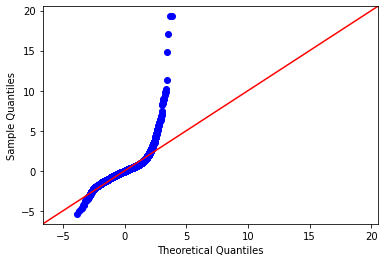

In [25]:
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

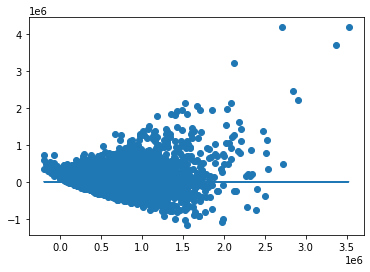

In [26]:
plt.scatter(model2.predict(train2[x_cols]), model2.resid)
plt.plot(model2.predict(train2[x_cols]), [0 for i in range(len(train2))])

Similar problems as last time, but our OLS has alerted us that there is strong collinearity. Let's investigate what we should remove.

In [27]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 23.09608478897893),
 ('bathrooms', 24.591759875968087),
 ('sqft_living', 25.181513925621946),
 ('sqft_lot', 1.18527557276325),
 ('floors', 13.133195105016583),
 ('waterfront', 1.0252421775002192),
 ('condition', 29.533165474917077),
 ('grade', 124.69739326481557),
 ('yr_built', 124.82668596464562)]

Going to drop 'grade' and 'yr_built' from our model for the time being and go from there. You usually want to remove variables with a cif of 10 or greater, incdicating that they are displaying multicollinearity with other variables in the feature set.

In [28]:
train2a, test2a = train_test_split(df_outlier_filter)

outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot', 'floors','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2a = ols(formula=formula, data=train2a).fit()
model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2455.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:12   Log-Likelihood:                -6808.5
No. Observations:               16197   AIC:                         1.363e+04
Df Residuals:                   16189   BIC:                         1.369e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.9077      0.022    553.659      0.000      11.866      11.950
bedrooms       -0.0516      0.004    -13.315      0.000      -0.059      -0.044
bathrooms       0.0374      0.006      5.935      0.000       0.025       0.050
sqft_living     0.0004    5.2e-06     74.033      0.000       0.000       0.000
sqft_lot    -2.323e-07   7.02e-08     -3.307      0.001    -3.7e-07   -9.46e-08
floors          0.0865      0.006     13.534      0.000       0.074       0.099
waterfront      0.5990      0.036     16.842      0.000       0.529       0.669
condition       0.0894      0.005     19.259      0.000       0.080       0.099
==============================================================================
Omnibus:                        6.108   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.547
Skew:                           0.004   Prob(JB):                       0.0379
Kurtosis:                       3.098   Cond. No.                     5.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 20.155807501016387),
 ('bathrooms', 24.05414728245284),
 ('sqft_living', 16.680775340246925),
 ('sqft_lot', 1.17958229220644),
 ('floors', 10.093490615100084),
 ('waterfront', 1.0251110953470544),
 ('condition', 10.865278180945477)]

In [30]:
train2b, test2b = train_test_split(df_outlier_filter)

x_cols = ['sqft_living','sqft_lot', 'floors','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2b = ols(formula=formula, data=train2b).fit()
model2b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     3381.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:12   Log-Likelihood:                -6876.5
No. Observations:               16197   AIC:                         1.377e+04
Df Residuals:                   16191   BIC:                         1.381e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.8219      0.020    585.477      0.000      11.782      11.862
sqft_living     0.0004   3.45e-06    109.181      0.000       0.000       0.000
sqft_lot    -2.335e-07   7.16e-08     -3.262      0.001   -3.74e-07   -9.32e-08
floors          0.1057      0.006     17.705      0.000       0.094       0.117
waterfront      0.6441      0.035     18.417      0.000       0.576       0.713
condition       0.0833      0.005     18.026      0.000       0.074       0.092
==============================================================================
Omnibus:                        0.317   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.342
Skew:                          -0.003   Prob(JB):                        0.843
Kurtosis:                       2.978   Cond. No.                     5.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 7.1722391606368525),
 ('sqft_lot', 1.1732206092964013),
 ('floors', 7.77186134275548),
 ('waterfront', 1.017459668782625),
 ('condition', 6.7043028937497136)]

In [32]:
train2c, test2c = train_test_split(df_outlier_filter)

x_cols = ['sqft_living','sqft_lot','waterfront','condition']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2c = ols(formula=formula, data=train2c).fit()
model2c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     4095.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:12   Log-Likelihood:                -6939.8
No. Observations:               16197   AIC:                         1.389e+04
Df Residuals:                   16192   BIC:                         1.393e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.0068      0.017    693.074      0.000      11.973      12.041
sqft_living     0.0004   3.24e-06    122.637      0.000       0.000       0.000
sqft_lot    -3.258e-07   7.32e-08     -4.451      0.000   -4.69e-07   -1.82e-07
waterfront      0.6368      0.037     17.327      0.000       0.565       0.709
condition       0.0632      0.004     14.045      0.000       0.054       0.072
==============================================================================
Omnibus:                        3.921   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.945
Skew:                          -0.035   Prob(JB):                        0.139
Kurtosis:                       2.970   Cond. No.                     5.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
X = df_col_drops[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('sqft_living', 5.2175232204298165),
 ('sqft_lot', 1.1680613101385844),
 ('waterfront', 1.0162448940537252),
 ('condition', 4.999908921746516)]

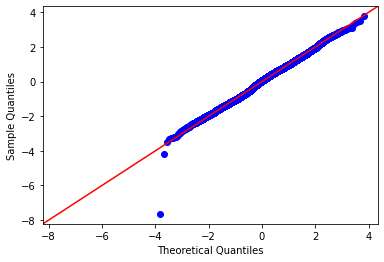

In [34]:
fig = sm.graphics.qqplot(model2c.resid, dist=stats.norm, line='45', fit=True)

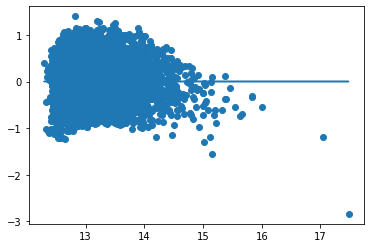

In [35]:
plt.scatter(model2c.predict(train2c[x_cols]), model2c.resid)
plt.plot(model2c.predict(train2c[x_cols]), [0 for i in range(len(train2c))])

This is a modeling choice. There are pros and cons to this approach versus the first model.  Removing multiple components has substantially diminished the model's performance, as indicated by the r-squared value.  However, multicollinearity between the features has been reduced.

## Model 3
Going back to the drawing board, let's look at a multicolinearity heatmap to determine the columns to remove from our model.

In [36]:
first_features = ['sqft_living', 'grade', 'bathrooms', 'sqft_lot', 'waterfront', 'floors', 'condition', 'yr_built']
corr = df_col_drops[first_features].corr()
corr

,sqft_living,grade,bathrooms,sqft_lot,waterfront,floors,condition,yr_built
sqft_living,1.000000,0.762779,0.755758,0.173453,0.104637,0.353953,-0.059445,0.318152
grade,0.762779,1.000000,0.665838,0.114731,0.082818,0.458794,-0.146896,0.447865
bathrooms,0.755758,0.665838,1.000000,0.088373,0.063629,0.502582,-0.126479,0.507173
sqft_lot,0.173453,0.114731,0.088373,1.000000,0.021459,-0.004814,-0.008830,0.052946
waterfront,0.104637,0.082818,0.063629,0.021459,1.000000,0.020797,0.016648,-0.024487
floors,0.353953,0.458794,0.502582,-0.004814,0.020797,1.000000,-0.264075,0.489193
condition,-0.059445,-0.146896,-0.126479,-0.008830,0.016648,-0.264075,1.000000,-0.361592
yr_built,0.318152,0.447865,0.507173,0.052946,-0.024487,0.489193,-0.361592,1.000000


<AxesSubplot:>

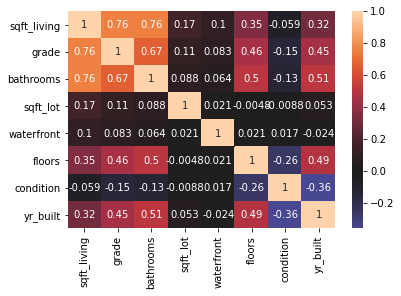

In [37]:
sns.heatmap(corr, center=0, annot=True)

sqft_living and grade = 0.76

sqft_living and bathrooms = 0.76

grade and bathrooms = 0.67

Let's remove grade and bathrooms for this model. We will also use our previous outlier filter, as this seems to be a step in the right direction.

In [38]:
train3, test3 = train_test_split(df_outlier_filter)

x_cols = ['sqft_living', 'sqft_lot', 'waterfront', 'floors', 'condition', 'yr_built']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model3 = ols(formula=formula, data=train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     3154.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:13   Log-Likelihood:                -6250.6
No. Observations:               16197   AIC:                         1.252e+04
Df Residuals:                   16190   BIC:                         1.257e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.2272      0.229     83.788      0.000      18.777      19.677
sqft_living     0.0004   3.42e-06    116.175      0.000       0.000       0.000
sqft_lot    -5.326e-08   7.39e-08     -0.721      0.471   -1.98e-07    9.16e-08
waterfront      0.5650      0.034     16.678      0.000       0.499       0.631
floors          0.1778      0.006     28.797      0.000       0.166       0.190
condition       0.0421      0.005      9.019      0.000       0.033       0.051
yr_built       -0.0038      0.000    -32.413      0.000      -0.004      -0.004
==============================================================================
Omnibus:                       18.539   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.599
Skew:                          -0.078   Prob(JB):                     9.15e-05
Kurtosis:                       3.055   Cond. No.                     3.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

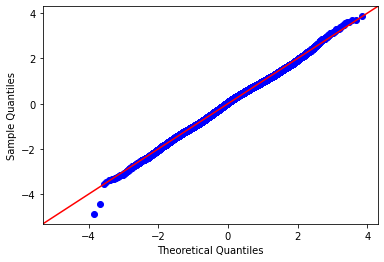

In [39]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

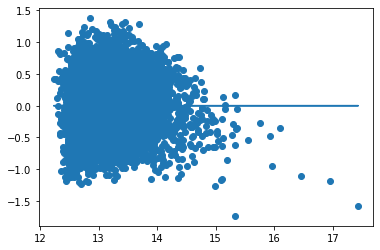

In [40]:
plt.scatter(model3.predict(train3[x_cols]), model3.resid)
plt.plot(model3.predict(train3[x_cols]), [0 for i in range(len(train3))])

## Model 4

Our QQ plots are less than ideal in previous models. Let's see if we can fix that by using a transform on the appropriate features.

In [41]:
for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
2.023641235344595
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
13.072603567136046
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978


'sqft_lot' seems to be the main issue with the highest skew coefficient. I'm not sure if I should apply this to waterfront. We may need to use another method here, or look elsewhere for model improvements.

In [42]:
#only run once
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.9625003856495555

<AxesSubplot:>

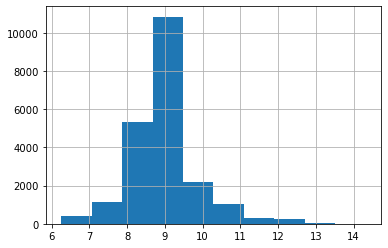

In [43]:
df_outlier_filter['sqft_lot'].hist()

In [44]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [45]:
x_cols = list(df_outlier_filter.columns)
x_cols.remove(outcome)

train4, test4 = train_test_split(df_outlier_filter)

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model4 = ols(formula=formula, data=train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3287.
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:14   Log-Likelihood:                -4121.6
No. Observations:               16197   AIC:                             8263.
Df Residuals:                   16187   BIC:                             8340.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      22.0864      0.213    103.653      0.000      21.669      22.504
bedrooms       -0.0957      0.011     -8.654      0.000      -0.117      -0.074
bathrooms       0.0818      0.006     14.250      0.000       0.071       0.093
sqft_living     0.0002    5.7e-06     35.236      0.000       0.000       0.000
sqft_lot       -0.0456      0.003    -14.249      0.000      -0.052      -0.039
floors          0.0517      0.006      8.529      0.000       0.040       0.064
waterfront      0.5087      0.030     16.966      0.000       0.450       0.568
condition       0.0441      0.004     10.724      0.000       0.036       0.052
grade           0.2275      0.004     64.452      0.000       0.221       0.234
yr_built       -0.0056      0.000    -51.083      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       92.111   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.494
Skew:                          -0.100   Prob(JB):                     5.05e-26
Kurtosis:                       3.364   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

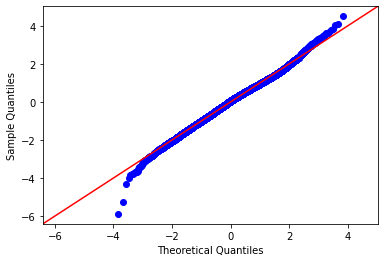

In [46]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)

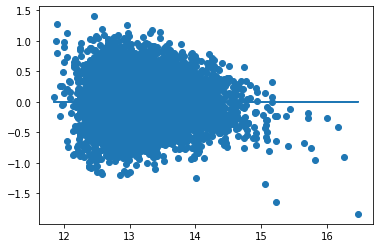

In [47]:
plt.scatter(model4.predict(train4[x_cols]), model4.resid)
plt.plot(model4.predict(train4[x_cols]), [0 for i in range(len(train4))])

This is a nice improvement. This is our best model thus far. It passes the normality check from looking at the QQ plot and it is homoscedastic.

## Conclusion

I believe the best model is Model 4, where the outliers have been filtered out and none of the features are removed . Although this suffers from multicollinearity, it has an r-squared value of ~0.647, which is the most accurate model in our analysis.


To further improve this, I would use more of the columns included in the original dataset to try to increase my r-squared value and hopefully fix the QQplot issues I was having for all of my models.